In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importation

In [3]:
reviews = pd.read_csv("order_reviews_dataset.csv")
products  = pd.read_csv("products_dataset.csv")
customers = pd.read_csv("customers_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")
orders_items = pd.read_csv("order_items_dataset.csv")
product_descr = pd.read_csv("product_category_name_translation.csv")
sellers = pd.read_csv("sellers_dataset.csv")
geolocalisation = pd.read_csv("geolocation_dataset.csv")
payments = pd.read_csv("order_payments_dataset.csv")

# Visualisation

In [4]:
reviews.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [5]:
products.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [6]:
customers.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [7]:
orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [8]:
orders_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [9]:
product_descr.head(1)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


In [10]:
sellers.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [11]:
geolocalisation.head(1)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


In [12]:
payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [37]:
#Merging the datasets on common keys as shown in the above data schema.
data = customers.merge(orders, on = 'customer_id') \
                .merge(orders_items, on = 'order_id') \
                .merge(reviews, on = 'order_id') \
                .merge(products, on = 'product_id') \
                .merge(sellers, on = 'seller_id') \
                .merge(payments, on = 'order_id') \



data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,2,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,1,275.79
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,1,275.79
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,7,140.61
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,10,137.58


In [38]:
data.shape

(117329, 39)

In [39]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [40]:
data.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
product_category

<AxesSubplot:>

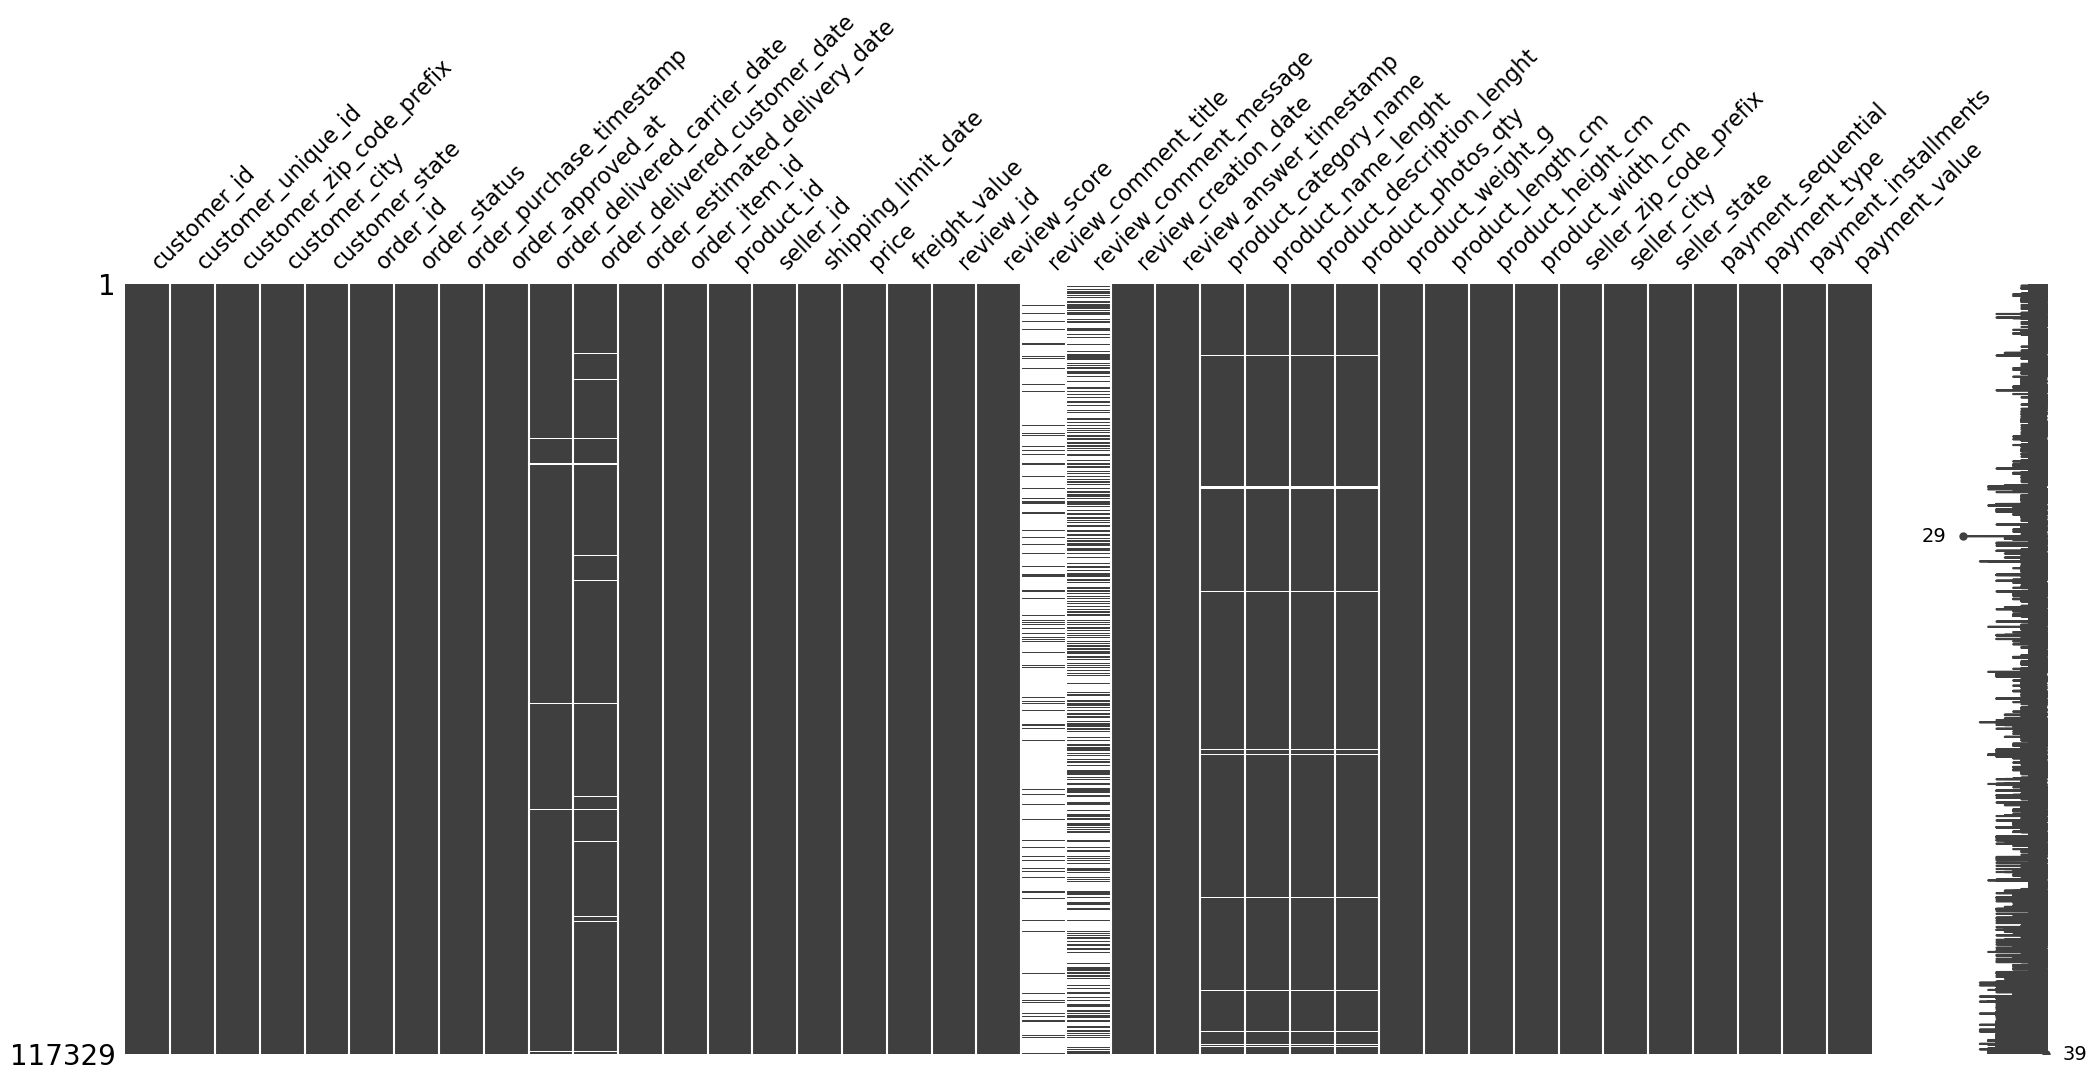

In [41]:
msno.matrix(data)

# Nettoyage

In [42]:
# vérification des doublons.
print(data.duplicated().value_counts()) 

False    117329
dtype: int64


In [43]:
data = data.drop(['review_comment_title', 'review_comment_message'], axis=1)

In [44]:
data.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,2,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,1,275.79
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,1,275.79
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,7,140.61
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,10,137.58
5,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,88460,angelina,SC,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-03-28 18:23:51,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,5,142.05
6,fbd40c083aa8cddebb5265b2ba6aaf2e,f40ab89b622248b7ca125af4b486b887,32341,contagem,MG,e0b26f14d2bcc710bb02f77a4628763b,delivered,2017-05-16 10:00:49,2017-05-17 03:45:27,2017-05-23 10:35:48,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,boleto,1,155.70
7,10558ef4afea173bfb5e2cbe3d5b0bb5,749943913a9851a39c9baf51877fbab6,78134,varzea grande,MT,eaae5bd20fb15d85aa673d9b7c0e8ca5,delivered,2017-03-18 23:04:36,2017-03-18 23:04:36,2017-03-28 06:29:47,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,2,148.33
8,1c37c0f0cd1d88d46d9fc9494762abbd,432ecfa8b7b7ad2663c7abed0dc83c51,31270,belo horizonte,MG,c4e2bd2043fbd75b325a47adfabf0d77,delivered,2018-03-15 07:45:10,2018-03-15 07:55:24,2018-03-27 15:58:41,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,3,150.07
9,20a452f528d487411fd7d3ebda1d0f20,31318a0597cd9d50ce4cfd03c80fe780,37540,santa rita do sapucai,MG,1c7fe02ac4c7be50c59afb295cf85b89,delivered,2018-01-26 13:22:09,2018-01-30 03:47:31,2018-02-09 13:17:44,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,boleto,1,257.50


In [45]:
data['order_status'].unique()

array(['delivered', 'shipped', 'invoiced', 'canceled', 'processing',
       'unavailable', 'approved'], dtype=object)

In [46]:
data['order_status'] = data['order_status'].astype(str)

In [47]:
data = data[data['order_status'] != 'canceled', 'unavailable' ]

InvalidIndexError: (0         True
1         True
2         True
3         True
4         True
          ... 
117324    True
117325    True
117326    True
117327    True
117328    True
Name: order_status, Length: 117329, dtype: bool, 'unavailable')

In [ ]:
data['order_status'].unique()

array(['delivered', 'shipped', 'invoiced', 'processing', 'approved'],
      dtype=object)

In [ ]:
data.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      745
order_delivered_customer_date    1918
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
product_category_name            1680
product_name_lenght              1680
product_description_lenght       1680
product_photos_qty               1680
product_weig

# Exploration

# Analyse

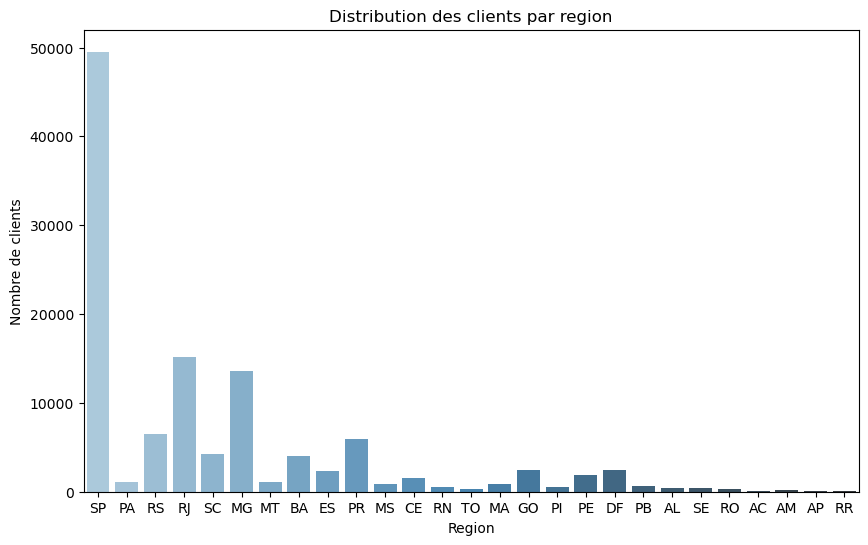

In [52]:
customer_columns = ['order_id', 'customer_id', 'customer_state']

plt.figure(figsize=(10, 6))
sns.countplot(x='customer_state', data=data[customer_columns], palette=("Blues_d"))
plt.title('Distribution des clients par region')
plt.xlabel('Region')
plt.ylabel('Nombre de clients')
plt.show()